In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
import yaml
import ssl

red_color_schema = "#cc1228"
green_color_schema = "#3c8c30"

In [2]:
def yaml_loader(config_path):
    with open(config_path) as f:
        return yaml.load(f)
    
config=yaml_loader("../server/config.yaml")

In [3]:
mongo_uri = config.get("mongo_uri").format(config.get("mongo_username"), config.get("mongo_password"))
db = MongoClient(mongo_uri,ssl=True,ssl_cert_reqs=ssl.CERT_NONE)
coll = db.ethereum.orders
# GET max and min prices.
result = coll.aggregate([{"$group": {"_id": None, "maxPrice": {"$max": "$price"}, "minPrice": {"$min": "$price"}
                                     }}])
data = result.next()
print(data)
max_price = int(data["maxPrice"])
min_price = int(data["minPrice"])

# print(y)

result = coll.find({})
datas = []
for data in result:
    datas.append(data)

{'_id': None, 'maxPrice': 227.32, 'minPrice': 201}


ETH Whales orders:


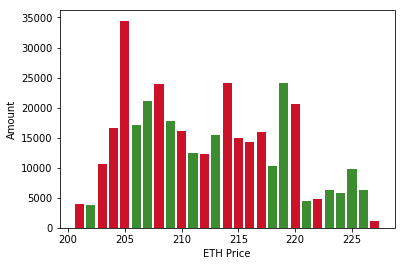

In [4]:
x = np.linspace(min_price,max_price,(max_price-min_price+1))
# print(x)

y = np.zeros((max_price-min_price+1))
y2 = np.zeros((max_price-min_price+1))


for data in datas:
        y[int(data["price"])-min_price]+=abs(data["amount"])
        y2[int(data["price"])-min_price]+=data["amount"]
# print(y)
# print(y2)
# print(x.shape)
for i in range(0,x.shape[0]):
    if y2[i]<0:
        y2[i]=y[i]
        y[i] = 0
    else:
        y2[i]=0
# print(y)
# print(y2)
print("ETH Whales orders:")
plt.xlabel('ETH Price')
plt.ylabel('Amount')

plt.bar(x, y, color=green_color_schema)
plt.bar(x,y2,color=red_color_schema)
plt.show()

ETH Whales orders larger than 300:


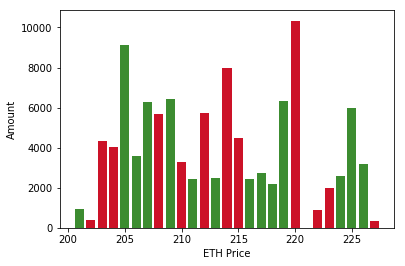

In [5]:
# Set a threshold for small orders.

y = np.zeros((max_price-min_price+1))
y2 = np.zeros((max_price-min_price+1))
threshold=300

for data in datas:
    if abs(data["amount"])>=threshold:
        y[int(data["price"])-min_price]+=abs(data["amount"])
        y2[int(data["price"])-min_price]+=data["amount"]

for i in range(0,x.shape[0]):
    if y2[i]<0:
        y2[i]=y[i]
        y[i] = 0
    else:
        y2[i]=0
# print(y)
# print(y2)
print("ETH Whales orders larger than 300:")


plt.xlabel('ETH Price')
plt.ylabel('Amount')

plt.bar(x, y, color=green_color_schema)
plt.bar(x,y2,color=red_color_schema)
plt.show()

In [17]:
def draw_volume(collection, start_time, end_time, filter_func=None, *, title=""):
    result = coll.find({"time": {"$lt": end_time,"$gt":start_time}})
    
    result = list(result)
    
    max_price = int(max(result, key=lambda x: x["price"])["price"])
    min_price = int(min(result, key=lambda x: x["price"])["price"])
    
    x = np.linspace(min_price,max_price,(max_price-min_price+1))

    y = np.zeros((max_price-min_price+1))
    y2 = np.zeros((max_price-min_price+1))


    for data in result:
        if not filter_func or filter_func(data):
            y[int(data["price"])-min_price]+=abs(data["amount"])
            y2[int(data["price"])-min_price]+=data["amount"]
        
    for i in range(0,x.shape[0]):
        if y2[i]<0:
            y2[i]=y[i]
            y[i] = 0
        else:
            y2[i]=0
            
    plt.title(title)
    plt.xlabel('ETH Price')
    plt.ylabel('Amount')

    plt.bar(x, y, color=green_color_schema)
    plt.bar(x,y2,color=red_color_schema)
    plt.show()

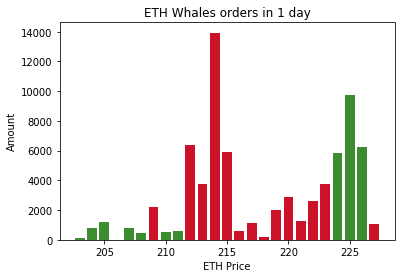

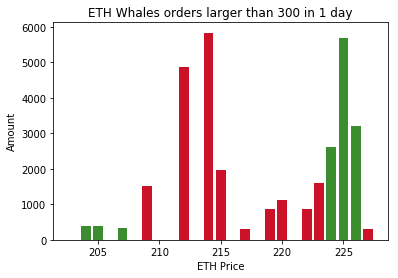

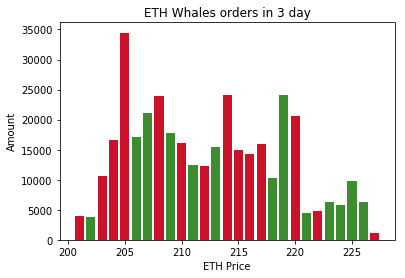

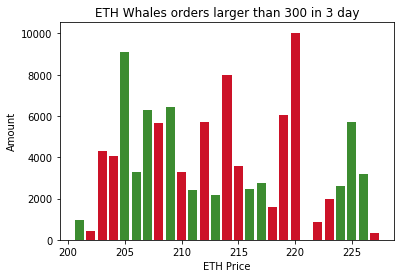

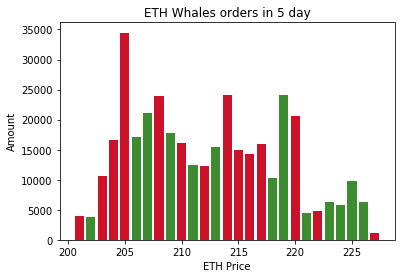

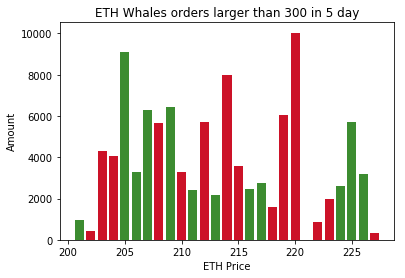

In [20]:
import time 

mongo_uri = config.get("mongo_uri").format(config.get("mongo_username"), config.get("mongo_password"))
db = MongoClient(mongo_uri,ssl=True,ssl_cert_reqs=ssl.CERT_NONE)
coll = db.ethereum.orders

draw_volume(coll, int((time.time()-24*3600)*1000), int(time.time()*1000), title="ETH Whales orders in 1 day")
draw_volume(coll, int((time.time()-24*3600)*1000), int(time.time()*1000), lambda x: abs(x["amount"]) > 300, title="ETH Whales orders larger than 300 in 1 day")

draw_volume(coll, int((time.time()-3*24*3600)*1000), int(time.time()*1000), title="ETH Whales orders in 3 day")
draw_volume(coll, int((time.time()-3*24*3600)*1000), int(time.time()*1000), lambda x: abs(x["amount"]) > 300, title="ETH Whales orders larger than 300 in 3 day")

draw_volume(coll, int((time.time()-5*24*3600)*1000), int(time.time()*1000), title="ETH Whales orders in 5 day")
draw_volume(coll, int((time.time()-5*24*3600)*1000), int(time.time()*1000), lambda x: abs(x["amount"]) > 300, title="ETH Whales orders larger than 300 in 5 day")